In [163]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [164]:
df=pd.read_csv("IRIS.csv")

In [165]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [167]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [168]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [169]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [170]:
df[df['species']=="Iris-setosa"].count()

sepal_length    50
sepal_width     50
petal_length    50
petal_width     50
species         50
dtype: int64

In [171]:
df[df['species']=="Iris-versicolor"].count()

sepal_length    50
sepal_width     50
petal_length    50
petal_width     50
species         50
dtype: int64

In [172]:
df[df['species']=="Iris-virginica"].count()

sepal_length    50
sepal_width     50
petal_length    50
petal_width     50
species         50
dtype: int64

In [173]:
# df[51:100]

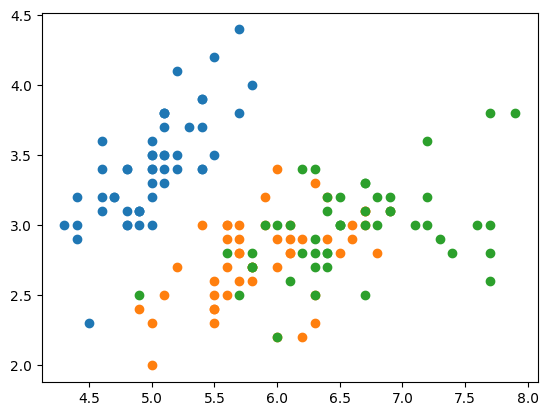

In [174]:
plt.scatter(df[:50]['sepal_length'],df[:50]["sepal_width"])
plt.scatter(df[51:100]['sepal_length'],df[51:100]["sepal_width"])
plt.scatter(df[101:]['sepal_length'],df[101:]["sepal_width"]) 

In [175]:
x=df.drop("species",axis=1) 

In [176]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [177]:
pca=PCA(n_components=1) 
X_pca=pca.fit_transform(x_scaler) 

In [178]:
pca.explained_variance_ratio_

array([0.72770452])

In [179]:
pca.n_components_

1

In [180]:
km=KMeans(n_clusters=3,random_state=42)
km.fit(X_pca) 

KMeans(n_clusters=3, random_state=42)

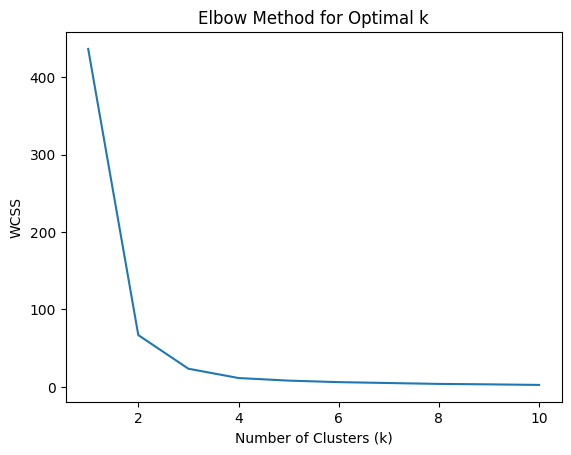

In [181]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# رسم النتائج
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [182]:
# labels = kmeans.labels_
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('K-Means Clustering on Iris Dataset')
# plt.show()